# **Unsupervised Learning and Customer Segmentation**

**Business Problem Description**

The objective of this project is to divide bank customers into segments based on their attributes for a loan campaign. Our aim is to comprehend various customer groups and adjust our marketing tactics accordingly.

**Data Collection**

We will commence by retrieving data from the supplied CSV file. Subsequently, we will conduct data cleansing, descriptive analysis, and visualization to gain insights into the dataset.



In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Load the dataset
bank_data = pd.read_csv("Bank_Loan_1.csv")

In [ ]:
# Display the first few rows of the dataset
bank_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


*Some key columns are described here:*

Experience: The work experience of the customer in years

Income: The estimated annual income of the customer (thousands of US dollars)

CCAvg: The average spending on credit cards per month (thousands of US dollars)

Mortgage: The value of the customer's house mortgage (if any)

Age: The age (in years) of the customer

In [ ]:
# Drop irrelevant columns and rows with missing values
bank_data.dropna(inplace=True)
bank_data.drop(columns=['ID', 'ZIP Code'], inplace=True)

### Data Visualization
We'll visualize the data to gain insights and identify patterns.

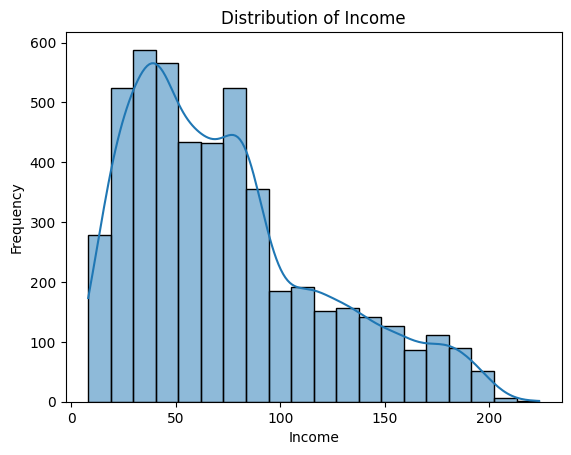

In [ ]:
# Visualize the distribution of Income and CCAvg
sns.histplot(bank_data['Income'], bins=20, kde=True)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

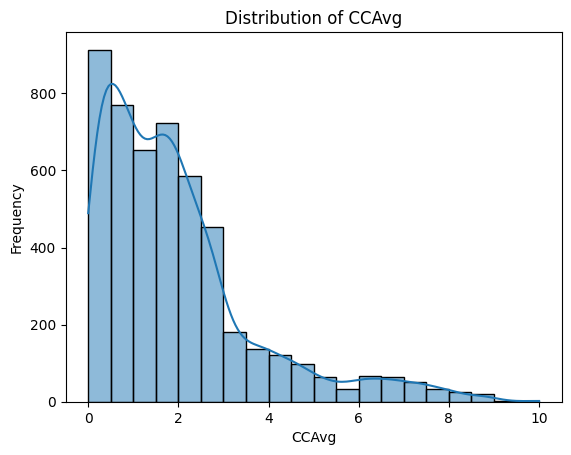

In [ ]:
# Visualize the distribution of CCAvg
sns.histplot(bank_data['CCAvg'], bins=20, kde=True)
plt.title('Distribution of CCAvg')
plt.xlabel('CCAvg')
plt.ylabel('Frequency')
plt.show()

In [ ]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**Data Cleaning**

We will examine the dataset to identify any missing values or discrepancies and undertake essential cleaning procedures.

In [ ]:
bank_data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
# Check for missing values in the DataFrame
missing_values = bank_data.isnull().sum()

# Display the count of missing values for each column
print("Missing Values:")
print(missing_values)


Missing Values:
ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


**Feature Engineering**

We'll perform feature scaling to standardize the numerical features.

In [ ]:
# Feature Engineering
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
bank_data[['Income_scaled', 'CCAvg_scaled']] = scaler.fit_transform(bank_data[['Income', 'CCAvg']])

In [ ]:
# Display the scaled features
bank_data[['Income_scaled', 'CCAvg_scaled']].describe()

,Income_scaled,CCAvg_scaled
count,5.000000e+03,5.000000e+03
mean,1.449507e-16,-6.394885e-17
std,1.000100e+00,1.000100e+00
min,-1.428969e+00,-1.108987e+00
25%,-7.554825e-01,-7.084116e-01
50%,-2.123482e-01,-2.506106e-01
75%,5.263146e-01,3.216407e-01
max,3.263712e+00,4.613525e+00


**Model Building**

K-means clustering is a popular unsupervised machine learning algorithm used for clustering similar data points into groups or clusters. The goal of K-means clustering is to partition a dataset into K clusters, where each data point belongs to the cluster with the nearest mean (centroid).

In [ ]:
# Model Building
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=42)

cluster_cols = ['Income_scaled', 'CCAvg_scaled']
model.fit(bank_data[cluster_cols])

bank_data['Cluster'] = model.predict(bank_data[cluster_cols])

**Visualize the clusters**

Visualize the clusters by using different markers and colors for the clusters on a scatter plot between Income and CCAvg.

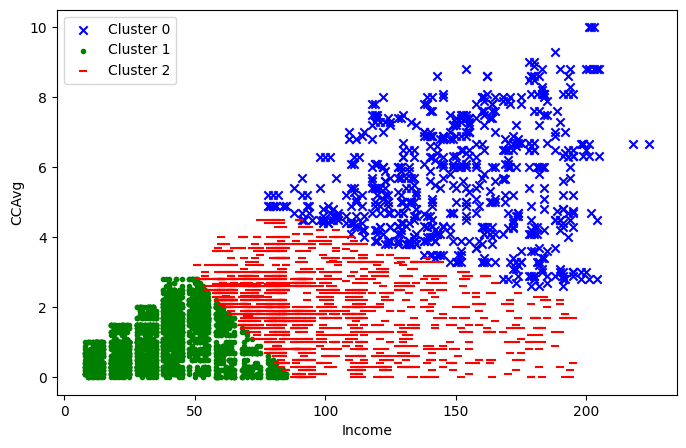

In [ ]:
# Visualize the clusters
markers = ['x', '.', '_']
colors = ['blue', 'green', 'red']

plt.figure(figsize=[8,5])
for clust in range(3):
    temp = bank_data[bank_data.Cluster == clust]
    plt.scatter(temp.Income, temp.CCAvg, marker=markers[clust], color=colors[clust], label="Cluster "+str(clust) )

plt.xlabel('Income')
plt.ylabel('CCAvg')
plt.legend()
plt.show()

To understand the clusters, print the average values of Income and CCAvg for the three clusters.
Perform a visual comparison of the clusters using the standardized values for Income and CCAvg.

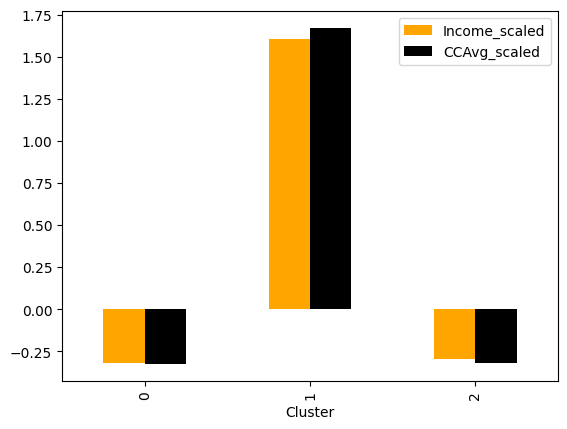

In [ ]:
bank_data.groupby('Cluster')[['Income_scaled', 'CCAvg_scaled']]\
                        .mean().plot\
                        .bar(color=['orange','black'])
plt.show()

**Evaluation Metrics**

Let's evaluate the performance of our clustering model using appropriate metrics.

In [ ]:
# Evaluation Metrics
sel_cols = ['Income', 'CCAvg', 'Age', 'Mortgage', 'Family', \
            'CreditCard', 'Online', 'Personal Loan']
bank_data.groupby('Cluster')[sel_cols].mean()

,Income,CCAvg,Age,Mortgage,Family,CreditCard,Online,Personal Loan
Cluster,,,,,,,,
0,58.941774,1.367514,55.536044,45.134935,2.397874,0.300370,0.604898,0.039741
1,147.650185,4.856403,43.672435,116.279357,2.002472,0.299135,0.613103,0.398022
2,60.124322,1.382121,35.116428,44.771584,2.552047,0.285150,0.581648,0.035520


**Segmentation** means grouping similar entities together.

**Model Iteration**

We'll now iterate over the model by considering additional features for segmentation.

In [ ]:
# Model Iteration with Multiple Features
cluster_cols = ['Income', 'CCAvg', 'Age', 'Experience', 'Mortgage']

bank_scaled = bank_data.copy()
bank_scaled[cluster_cols] = scaler.fit_transform(bank_scaled[cluster_cols])

In [ ]:
bank_scaled[cluster_cols].describe()

,Income,CCAvg,Age,Experience,Mortgage
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,1.449507e-16,-6.394885e-17,-2.131628e-18,-1.179501e-16,-5.613288e-17
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.428969e+00,-1.108987e+00,-1.948906e+00,-2.014911e+00,-5.555239e-01
25%,-7.554825e-01,-7.084116e-01,-9.019702e-01,-8.812043e-01,-5.555239e-01
50%,-2.123482e-01,-2.506106e-01,-2.952359e-02,-9.121982e-03,-5.555239e-01
75%,5.263146e-01,3.216407e-01,8.429230e-01,8.629604e-01,4.375576e-01
max,3.263712e+00,4.613525e+00,1.889859e+00,1.996667e+00,5.688108e+00


In [ ]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(bank_scaled[cluster_cols])

bank_scaled['Cluster'] = model.predict(bank_scaled[cluster_cols])

**Principal Component Analysis (PCA)**

In [ ]:
# Perform Principal Component Analysis (PCA) for visualization
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca_res = pca.fit_transform(bank_scaled[cluster_cols])

bank_scaled['pc1'] = pca_res[:,0]
bank_scaled['pc2'] = pca_res[:,1]

Visualize the clusters by using different markers for the clusters on a scatter plot between pc1 and pc2.

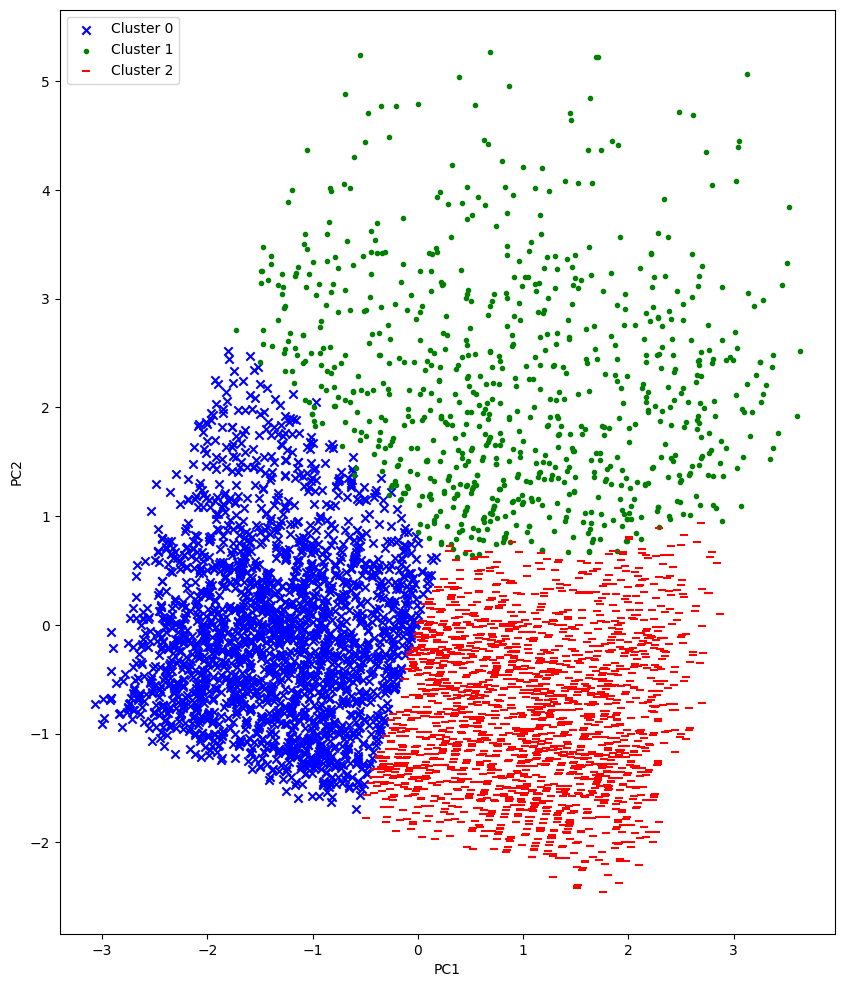

In [ ]:
# Define colors for each cluster
colors = ['blue', 'green', 'red']

plt.figure(figsize=[10,12])

for clust in range(3):
    temp = bank_scaled[bank_scaled.Cluster == clust]
    plt.scatter(temp.pc1, temp.pc2, marker=markers[clust], label="Cluster "+str(clust), color=colors[clust])

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

To understand the clusters, print the average values of the features used for clustering against the three clusters. Check which features are the most differentiated for the clusters.

In [ ]:
# Display the mean values of features by cluster
bank_data['Cluster'] = bank_scaled.Cluster
bank_data.groupby('Cluster')[cluster_cols].mean()

,Income,CCAvg,Age,Experience,Mortgage
Cluster,,,,,
0,58.941774,1.367514,55.536044,30.233826,45.134935
1,147.650185,4.856403,43.672435,18.644005,116.279357
2,60.124322,1.382121,35.116428,9.873705,44.771584


To understand the clusters better using other relevant features, print the average values against the clusters for the Age, Mortgage, Family, CreditCard, Online, and Personal Loan features and check which cluster has the highest propensity for taking a personal loan.

In [ ]:
sel_cols = ['Income', 'CCAvg', 'Age', 'Experience', 'Mortgage', \
            'Family', 'CreditCard', 'Online', 'Personal Loan']

bank_data.groupby('Cluster')[sel_cols].mean()

,Income,CCAvg,Age,Experience,Mortgage,Family,CreditCard,Online,Personal Loan
Cluster,,,,,,,,,
0,58.941774,1.367514,55.536044,30.233826,45.134935,2.397874,0.300370,0.604898,0.039741
1,147.650185,4.856403,43.672435,18.644005,116.279357,2.002472,0.299135,0.613103,0.398022
2,60.124322,1.382121,35.116428,9.873705,44.771584,2.552047,0.285150,0.581648,0.035520
